# OpenCV
**Prerequisite:** Before starting this exercise, you should make yourself familiar with Python and some necessary library, e.g., numpy, matplotlib, etc. One good tutorial can be found [here](http://cs231n.github.io/python-numpy-tutorial/).

In this exercise you will:
* Learn about some basic image processing operations with OpenCV.
* Re-implement some basic image processing operations. This will help you to
 * Have better understand about the image processing operations.
 * Practice Python programming with Numpy library.

In [1]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def rel_error(out, correct_out):
    return np.sum(abs(out.astype(np.float32) - correct_out.astype(np.float32)) / 
                          (abs(out.astype(np.float32)) + abs(correct_out.astype(np.float32))))

In [3]:
# Checking OpenCV version
cv2.__version__

'4.7.0'

### NOTICE: 
In this lab exercise, we recommend to use `OpenCV 3.x` version, the documentations for OpenCV API can be found [here](https://docs.opencv.org/3.0-beta/index.html).

## Load images
Use the function [cv2.imread()](https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=cv2.imread#cv2.imread) to read an image. The image should be in the working directory or a full path of image should be given. The function will return a numpy matrix.

Second argument is a flag which specifies the way image should be read.

 * cv2.IMREAD_COLOR - (1): Loads a color image. Any transparency (alpha channel) of image will be neglected. It is the **default flag**.
 * cv2.IMREAD_GRAYSCALE - (0): Loads image in grayscale mode
 * cv2.IMREAD_UNCHANGED - (-1): Loads image as such including alpha channel, if included.
 
**NOTE**: Color image loaded by OpenCV is in *Blue-Green-Red (BGR)* mode. But Matplotlib displays in *RGB* mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV. We will discuss how to handle to display properly later.

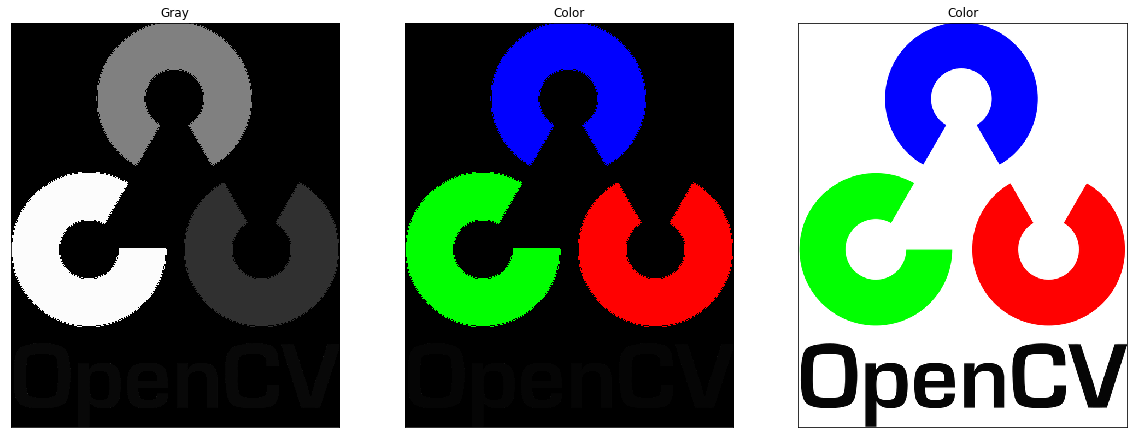

In [4]:
img_gray = cv2.imread('imgs/opencv_logo.png', 0)

plt.figure(figsize=(20,10))
plt.subplot(131),
plt.imshow(img_gray, cmap='gray')  # include cmap='gray' to display gray image
plt.title('Gray'),plt.xticks([]), plt.yticks([])

img_color1= cv2.imread('imgs/opencv_logo.png', 1)
plt.subplot(132),plt.imshow(img_color1),
plt.title('Color'),plt.xticks([]), plt.yticks([])

img_color2= cv2.imread('imgs/opencv_logo.png',-1)
plt.subplot(133),plt.imshow(img_color2),
plt.title('Color'),plt.xticks([]), plt.yticks([])
plt.show()

**Question:** How many channels for each image: img_gray, img_color1, img_color2?

In [5]:
print(img_gray.shape, img_color1.shape, img_color2.shape)

(742, 602) (742, 602, 3) (742, 602, 4)


**Your answer**: 
* img_gray: 1
* img_color1: 3
* img_color2: 4

# Transformations
## Scaling
Resize image using the function [cv2.resize](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.resize#cv2.resize).

In [6]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('INTER_')]
print (flags)

['INTER_AREA', 'INTER_BITS', 'INTER_BITS2', 'INTER_CUBIC', 'INTER_LANCZOS4', 'INTER_LINEAR', 'INTER_LINEAR_EXACT', 'INTER_MAX', 'INTER_NEAREST', 'INTER_NEAREST_EXACT', 'INTER_TAB_SIZE', 'INTER_TAB_SIZE2']


In [7]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
res = cv2.resize(img,None,fx=2.0, fy=2.0, interpolation = cv2.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

################################################################################
# TO DO: Check the size of 'img' and 'res'?
################################################################################
print('Size of img: ', img.shape)
print('Size of res: ', res.shape)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

################################################################################
# TO DO: Resize 'img' so as to the smaller side is 500, while keeping image 
# ration unchanged.
################################################################################
resized_height = int((500/height)*width)
answer = cv2.resize(img,(resized_height, 500), interpolation = cv2.INTER_CUBIC)
print('Size of answer: ', answer.shape)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Size of img:  (378, 428, 3)
Size of res:  (756, 856, 3)
Size of answer:  (500, 566, 3)


## Translation
Translation is the shifting of object's location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $M$ as follows:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$
You can take make it into a Numpy array of type **np.float32** and pass it into [cv2.warpAffine()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.warpaffine#cv2.warpAffine) function.

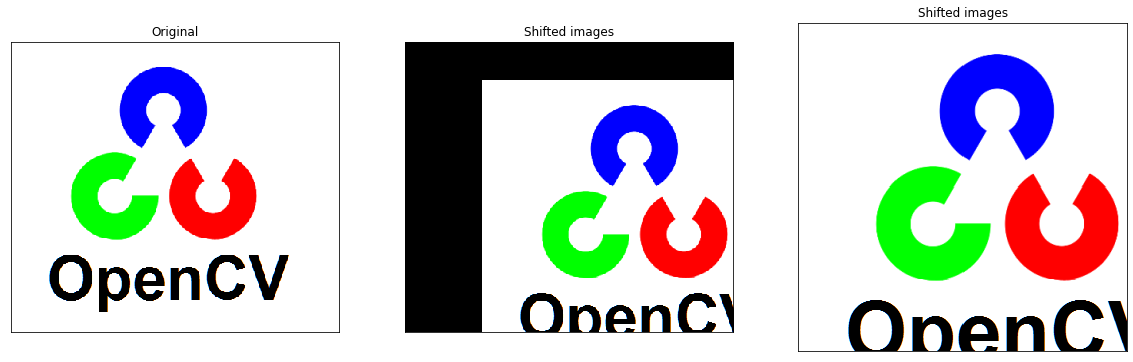

In [8]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
rows,cols,_ = img.shape
M = np.float32([[1,0,100],[0,1,50]]) # Shift right by 100 and down by 50
dst = cv2.warpAffine(img,M,(cols,rows))

################################################################################
# TO DO: Observed that the bottom right of 'dst' image is lost. Modifying the
# following codeline so as to the 'res' image is fully shown.
################################################################################
res = cv2.warpAffine(dst, np.float32([[1,0,-100],[0,1,-50]]), (cols-100,rows-50))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(res),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.show()

## Rotation
Calculates an affine matrix of 2D rotation using [cv2.getRotationMatrix2D()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.getrotationmatrix2d#cv2.getRotationMatrix2D).
 * 1st argument: center
 * 2nd argument: angle (in degree)
 * 3rd argument: scale

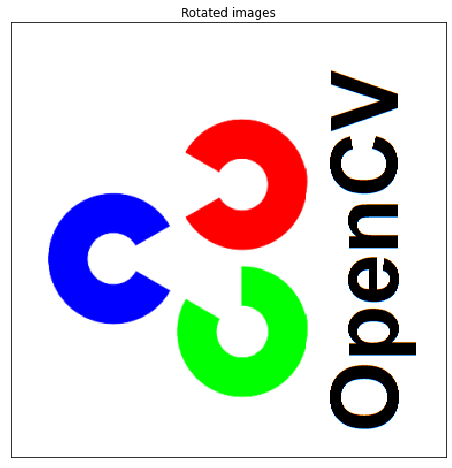

In [9]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
H,W,_ = img.shape
################################################################################
# TO DO: Run the code to observe the output image.
# Modifying the code below so as to the 'dst' image has no black padding.
################################################################################
M = cv2.getRotationMatrix2D((W/2,H/2),90,1)
dst = cv2.warpAffine(img,M,(W,H))
dst = cv2.warpAffine(dst, np.float32([[1,0,-25],[0,1,0]]), (W-(428-378),H))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.imshow(dst),
plt.title('Rotated images'),plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
print(np.round(M))
print(dst.shape)

[[  0.   1.  25.]
 [ -1.   0. 403.]]
(378, 378, 3)


# Changing color space - Grayscale
Grayscale values is converted from RGB values by a weighted sum of the R, G, and B components:

$$0.2989 \times R + 0.5870 \times G + 0.1140 \times B $$

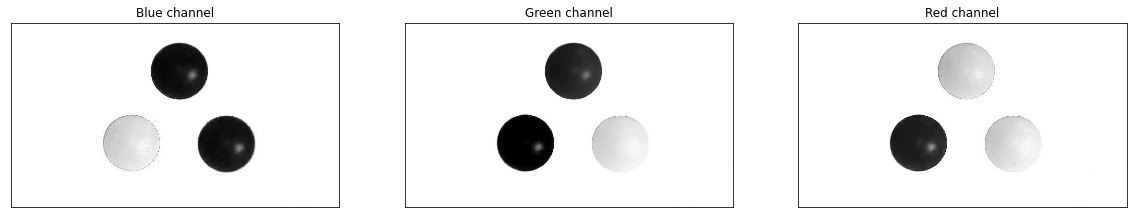

In [11]:
# Split channels
img = cv2.imread('imgs/balls.jpg', 1)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img[:,:,0], cmap='gray'),
plt.title('Blue channel'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img[:,:,1], cmap='gray'),
plt.title('Green channel'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img[:,:,2], cmap='gray'),
plt.title('Red channel'),plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
def rgb2gray(img):
    """
    A implementation of the method that converts BGR image to grayscale image of 
    uint8 data type.
    """
    out = img
    ################################################################################
    # TO DO: Implement the method to convert BGR image to Grayscale image.         #
    # Hint: Remember to round and convert the values to nearest uint8 values.      #
    ################################################################################
    out = np.rint(0.2989*img[:, :, 2] + 0.5870*img[:, :, 1] + 0.1140*img[:, :, 0])
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    
    return out

Run the following code section to compare your implementation of the `rgb2gray` function with OpenCV built-in function [cv2.cvtColor](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.cvtcolor#cv2.cvtColor).

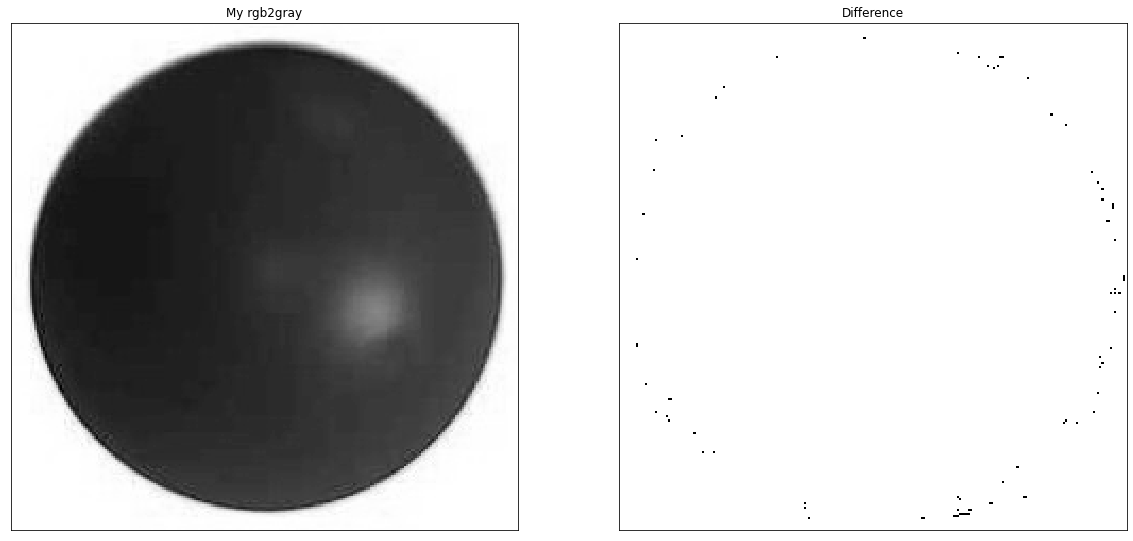

Testing rgb2gray
Number of difference pixel is 81


In [13]:
img = cv2.imread('imgs/ball_red.jpg', 1)
img_gray1 = rgb2gray(img)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img_gray1, cmap='gray'),
plt.title('My rgb2gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gray1 - img_gray2, cmap='gray'),
plt.title('Difference'),plt.xticks([]), plt.yticks([])
plt.show()

# Check your output: count 
print('Testing rgb2gray')
print('Number of difference pixel is %d' % np.count_nonzero(img_gray1 - img_gray2))

**Question:** Does your implementation of `rgb2gray` function give the result that is exactly the same as OpenCV built-in function? Why?

**Your answer:** No. This is because the OpenCV built-in function uses 0.299 as the coefficient, instead of 0.2989, for the red channel.

# Changing color space - Detect object by color. 
By converting BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In this exercise, we will try to extract blue, red, and yellow colored objects. So here is the method:

 * Take each frame of the video
 * Convert from BGR to HSV color-space 
 * We threshold the HSV image for a range of blue color
 * Now extract the blue object alone, we can do whatever on that image we want.

In [14]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

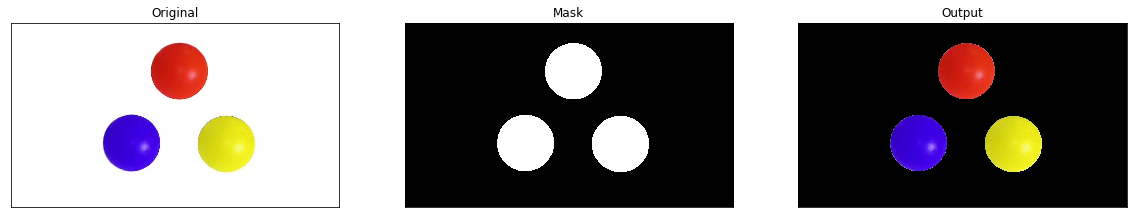

In [15]:
frame = cv2.imread('imgs/balls.jpg', 1)

# Convert BGR to RGB, now you will see the color of 'frame' image
# is displayed properly.
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

################################################################################
# TO DO: Implement masks for red and yellow balls. 
################################################################################
lower_red = np.array([0,100,100])
upper_red = np.array([255,255,255])
mask_red = cv2.inRange(hsv, lower_red, upper_red)
blue_or_red = cv2.bitwise_or(mask_red, mask)

lower_yellow = np.array([20,100,100])
upper_yellow = np.array([40,255,255])
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
blue_or_red_or_yellow = cv2.bitwise_or(blue_or_red, mask_yellow)
mask = blue_or_red_or_yellow

res = cv2.bitwise_and(frame,frame, mask= mask)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(frame),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask, cmap='gray'),
plt.title('Mask'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(res),
plt.title('Output'),plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
yellow = np.uint8([[[0, 255, 255]]])
hsv_yellow= cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)

red = np.uint8([[[0, 0, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print('yellow: ', hsv_yellow)
print('red: ', hsv_red)

yellow:  [[[ 30 255 255]]]
red:  [[[  0 255 255]]]


# 2D Convolution ( Image Filtering )

OpenCV provides a function, [cv2.filter2D](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#cv2.filter2D), to convolve a kernel with an image.
 
 

In [17]:
def convolution_naive(x, F, conv_param):
    """
    A naive implementation of a convolutional filter.
    
    The input consists of a gray scale image x (1 channel) with height H and width
    W. We convolve each input with filter F, which has height HH and width HH.
    
    Input:
    - x: Input data of shape (H, W)
    - F: Filter weights of shape (HH, WW)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.
    
    Return:
    - out: Output data, of shape (H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    """
    
    stride = conv_param['stride']
    pad = conv_param['pad']
    H, W = x.shape
    HH, WW = F.shape
    H_prime = int(1 + (H + 2 * pad - HH) / stride)
    W_prime = int(1 + (W + 2 * pad - WW) / stride)
    x_pad = np.lib.pad(x, ((pad, pad), (pad, pad)),\
                            'constant', constant_values=(0))
    out = np.zeros((H_prime, W_prime), dtype=x.dtype)
    print(x_pad.shape)
    #############################################################################
    # TODO: Implement the convolutional forward pass.                           #
    # Hint: Using 2 nested for-loop to calculate each pixel of the output image.#
    #############################################################################
    for i in range(0,len(x_pad)):  
        for j in range(0,len(x_pad[0])): 
            temp = x_pad[i*stride : i+HH*stride, j*stride : WW+j*stride]
            if temp.shape != F.shape:
                continue
            out[i, j] = sum( sum(temp*F) )
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

Run the following code section to test your implementation of the `convolution_naive` function

In [18]:
x_shape = (5, 5)
F_shape = (3, 3)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
F = np.linspace(-0.2, 0.3, num=np.prod(F_shape)).reshape(F_shape)
conv_param = {'stride': 1, 'pad': 1}

out = convolution_naive(x, F, conv_param)
correct_out = np.array( [[ 0.0075,     0.030625,   0.0521875,  0.07375,    0.0475   ],
                         [ 0.114375,   0.1725,     0.18375,    0.195,      0.10875  ],
                         [ 0.1753125,  0.22875,    0.24,       0.25125,    0.1228125],
                         [ 0.23625,    0.285,      0.29625,    0.3075,     0.136875 ],
                         [ 0.0075,    -0.05375,   -0.0603125, -0.066875,  -0.1025   ]])
print(correct_out.shape)
print(out)

# Compare your output to ours; difference should be very small
print('Testing convolution_naive')
print('difference: ', rel_error(out, correct_out))

(7, 7)
(5, 5)
[[ 0.0075     0.030625   0.0521875  0.07375    0.0475   ]
 [ 0.114375   0.1725     0.18375    0.195      0.10875  ]
 [ 0.1753125  0.22875    0.24       0.25125    0.1228125]
 [ 0.23625    0.285      0.29625    0.3075     0.136875 ]
 [ 0.0075    -0.05375   -0.0603125 -0.066875  -0.1025   ]]
Testing convolution_naive
difference:  0.0


In [19]:
# List of available BORDER effect
flags = [i for i in dir(cv2) if i.startswith('BORDER_')]
print(flags)

['BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_REFLECT', 'BORDER_REFLECT101', 'BORDER_REFLECT_101', 'BORDER_REPLICATE', 'BORDER_TRANSPARENT', 'BORDER_WRAP']


## Averaging filter
This is done by convolving image with a normalized box filter. A $5\times 5$ normalized box filter would look like below:
$$K = \frac{1}{25} \begin{bmatrix} 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\1&1&1&1&1 \end{bmatrix}$$

Testing convolution_naive
difference:  0.0035056125


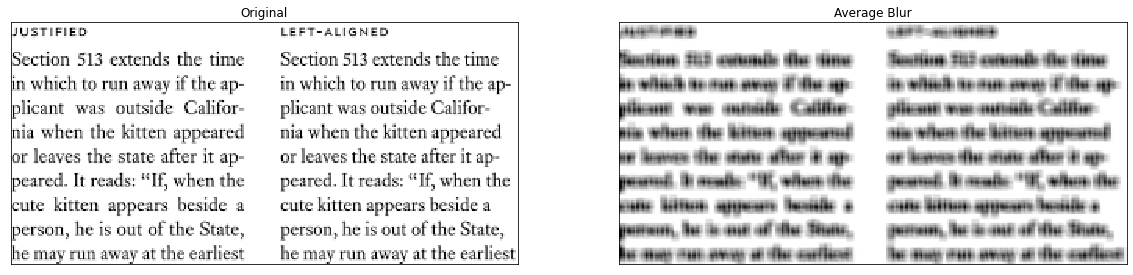

In [20]:
# Convert image data type from uint8 to float32.
img = cv2.imread('imgs/text.png', 1).astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.zeros((5,5), np.float32)
################################################################################
# TODO: Create a 5x5 kernel as K shown above.                                  #
################################################################################
kernel = np.ones((5,5), np.float32)/25.0
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
blur_2dfilter = cv2.filter2D(img,-1,kernel)

# The above codes can be replaced by the following code line.
blur = cv2.blur(img,(5,5))

# Check your output; difference should be around 4e-3
print('Testing convolution_naive')
print('difference: ', rel_error(blur_2dfilter, blur))


# Visualize the output image
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),
plt.title('Average Blur'),plt.xticks([]), plt.yticks([])
plt.show()